## *Submitted by:* - `Sunita Pradhan`

In [90]:
#Importing required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
# from imblearn.over_sampling import SMOTENC,RandomOverSampler,KMeansSMOTE
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,auc,RocCurveDisplay
from sklearn.model_selection import cross_val_score

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
#Reading data
data = pd.read_csv('online_shoppers_intention.csv')

In [4]:
#Fatchiing 1st 5 rows of data
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [5]:
data.shape

(12330, 18)

In [6]:
#Brief info about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

### Missing value detection

In [7]:
data.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [8]:
#Checking if there any duplicated value
data.duplicated().sum()

125

There is 1125 duplicate values.

In [9]:
#Creating a copy of original dataframe
df = data.copy()

In [10]:
# Remove duplicates in-place
df.drop_duplicates(inplace=True)

In [11]:
df.duplicated().sum()

0

In [12]:
#all numerical columns
numerical_col = ['Administrative',
 'Administrative_Duration',
 'Informational',
 'Informational_Duration',
 'ProductRelated',
 'ProductRelated_Duration',
 'BounceRates',
 'ExitRates',
 'PageValues',
 'SpecialDay',
 'OperatingSystems',
 'Browser',
 'Region',
 'TrafficType']

In [13]:
#all Categorical columns
categorical_col = [fea for fea in df.columns if df[fea].dtype == 'O']
categorical_col

['Month', 'VisitorType']

### Outliers Detection

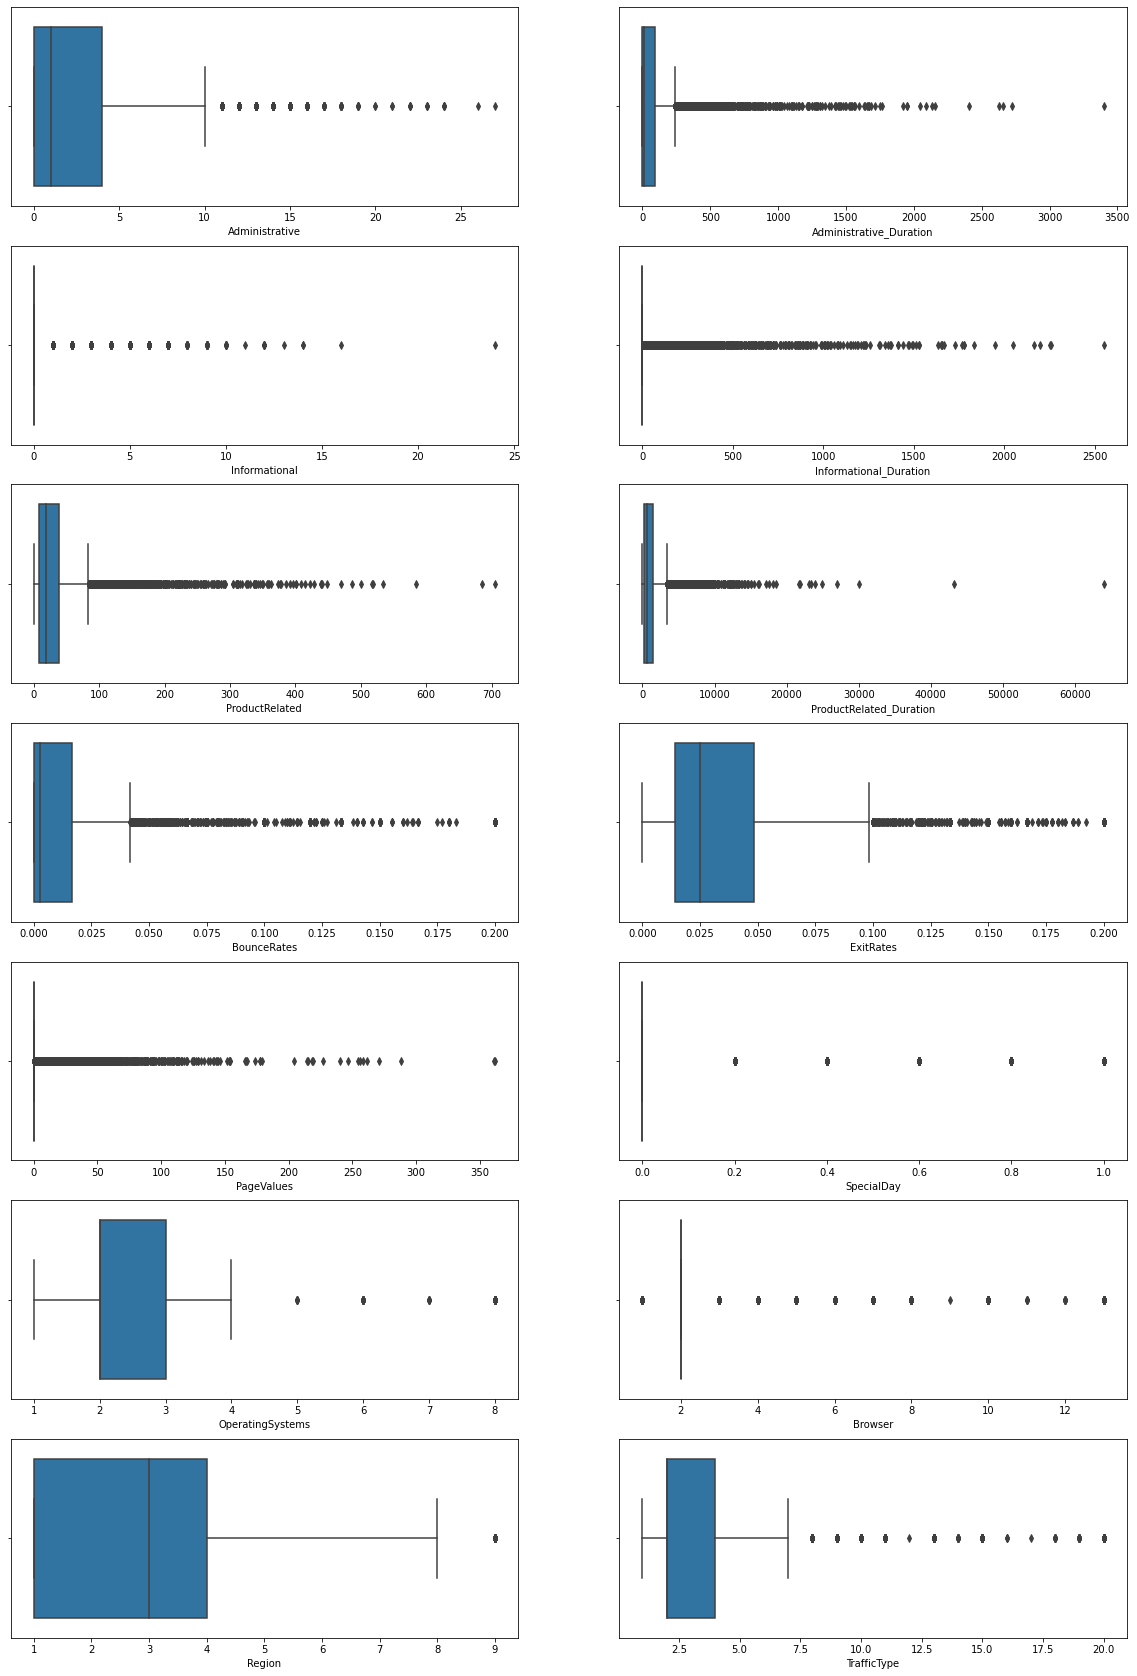

In [14]:
## Plot boxplots for each numerical column

fig = plt.figure(figsize=[20,30])
for i ,col in enumerate(numerical_col):  
    ax1 = fig.add_subplot(7,2, i+1);
    ax1 = sns.boxplot(data = df, x=col)

There are lots of outliers preesnt. I need to handle these for model building.

In [15]:
df.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [16]:
for col in df.columns:
    print(col, df[col].unique())

Administrative [ 0  1  2  4 12  3 10  6  5  9  8 16 13 11  7 18 14 17 19 15 24 22 21 20
 23 27 26]
Administrative_Duration [  0.         53.         64.6       ... 167.9107143 305.125
 150.3571429]
Informational [ 0  1  2  4 16  5  3 14  6 12  7  9 10  8 11 24 13]
Informational_Duration [  0.   120.    16.   ... 547.75 368.25 211.25]
ProductRelated [  1   2  10  19   0   3  16   7   6  23  13  20   8   5  32   4  45  14
  52   9  46  15  22  11  12  36  42  27  90  18  38  17 128  25  30  21
  51  26  28  31  24  50  96  49  68  98  67  55  35  37  29  34  71  63
  87  40  33  54  64  75  39 111  81  61  47  44  88 149  41  79  66  43
 258  80  62  83 173  48  58  57  56  69  82  59 109 287  53  84  78 137
 113  89  65  60 104 129  77  74  93  76  72 194 140 110 132 115  73 328
 160  86 150  95 130 151 117 124 127 125 116 105  92 157 154 220 187 112
 131 159  94 204 142 206 102 313 145  85  97 198 181 126 106 101 108 119
  70 122  91 276 100 291 114 172 217 141 133 156 136 180 135 195 

<Axes: xlabel='Revenue', ylabel='count'>

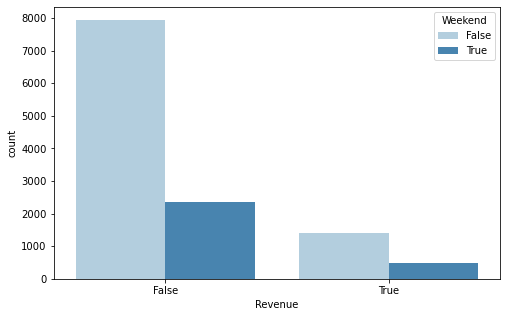

In [17]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Revenue', hue='Weekend',palette='Blues')

In [18]:
# <!-- monthly = df['Month'].value_counts()

# sns.countplot(df['Month'], order=monthly.index)
# plt.title('Entries per Month', fontsize=15)
# xval = -.42
# plt.ylim(0,4000)

# for index, value in monthly.items():
#     plt.text(x=xval, y=value+50, s=str(value))
#     xval += 1.02 -->

<Axes: xlabel='Month', ylabel='count'>

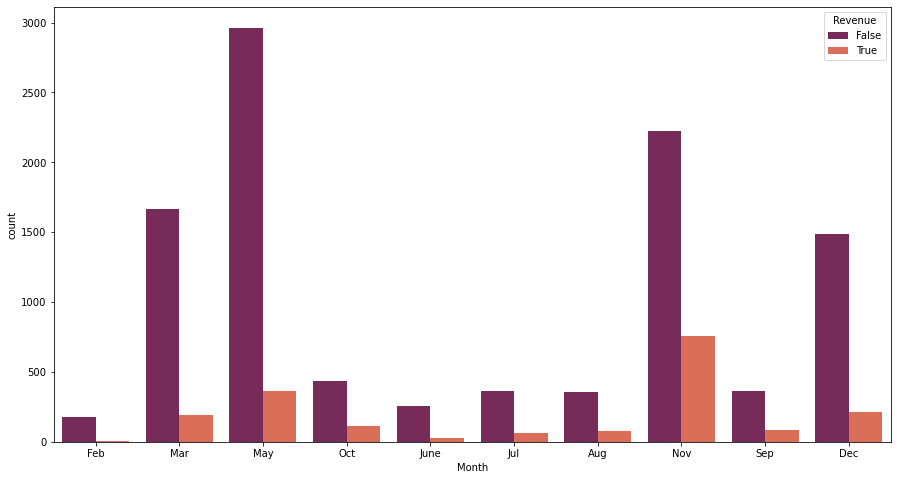

In [19]:
plt.figure(figsize=(15, 8))
sns.countplot(data=df, x='Month', hue='Revenue',palette='rocket')
#Revenue 0 for False and 1 for True

<Axes: xlabel='VisitorType', ylabel='count'>

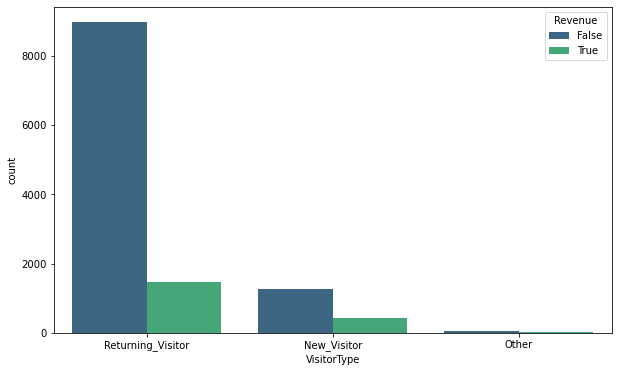

In [20]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='VisitorType', hue='Revenue',palette='viridis')

<Axes: xlabel='Revenue', ylabel='count'>

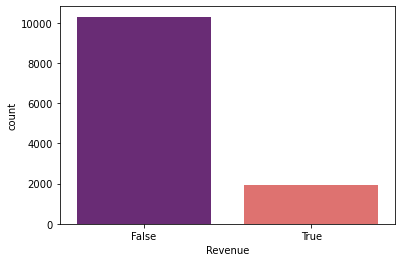

In [21]:
sns.countplot(data=df,x='Revenue', palette='magma')

<Axes: xlabel='Weekend', ylabel='count'>

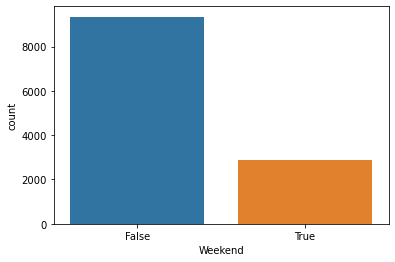

In [22]:
sns.countplot(data=df,x='Weekend')

##### Weekend feture is the target feture but it is imbalaced.

### Transformation categorical data into numerical

In [23]:
#Converting all categorical fetures into numerical by labelencoding

col_for_encode = ['Month','VisitorType','Weekend', 'Revenue']
lblEn = LabelEncoder()

for col in col_for_encode:
    df[col] = lblEn.fit_transform(df[col])

### Handling Outliers

In [24]:
#Calculate the median
# median = df[numerical_col].median()

# # Replace outliers with median
# df[numerical_col] = np.where((df[numerical_col] < median - 1.5 * (df[numerical_col].quantile(0.75) - df[numerical_col].quantile(0.25))) |
#                         (df[numerical_col] > median + 1.5 * (df[numerical_col].quantile(0.75) - df[numerical_col].quantile(0.25))),
#                         median, df[numerical_col])

In [25]:
df.shape

(12205, 18)

In [26]:
# Calculate IQR for numerical columns
# Q1 = df[numerical_col].quantile(0.25)
# Q3 = df[numerical_col].quantile(0.75)
# IQR = Q3 - Q1

# # Remove data points outside the lower and upper bounds
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR
# df = df[~((df[numerical_col] < lower_bound) | (df[numerical_col] > upper_bound)).any(axis=1)]

In [27]:
df.shape

(12205, 18)

In [28]:
# 
# X = df.drop('Weekend', axis=1)
# Y = df['Weekend']

In [29]:
# X_normalized = (X-X.mean())/X.std()

In [30]:
# # IQR
# # Find Q1, Q3
# # 1.
# Q1 = np.percentile(X , 25)
# Q3 = np.percentile(X , 75)

# # 2.
# Q1,Q3 = np.percentile(X , [25,75])

# # Find IQR, upper limit, lower limit
# IQR = Q3 - Q1
# ul = Q3+1.5*IQR
# ll = Q1-1.5*IQR

# # Find outliers
# outliers = X[(X > ul) | (X < ll)]

In [31]:
# We can also count the outliers per column:
# outliers.count()

In [32]:
lower_percentile = 5
upper_percentile = 95

# Calculate lower and upper bounds based on percentiles
lower_bound = df[numerical_col].quantile(lower_percentile / 100)
upper_bound = df[numerical_col].quantile(upper_percentile / 100)

# Replace values below lower percentile with lower bound and values above upper percentile with upper bound
df[numerical_col] = np.where(df[numerical_col] < lower_bound, lower_bound, df[numerical_col])
df[numerical_col] = np.where(df[numerical_col] > upper_bound, upper_bound, df[numerical_col])

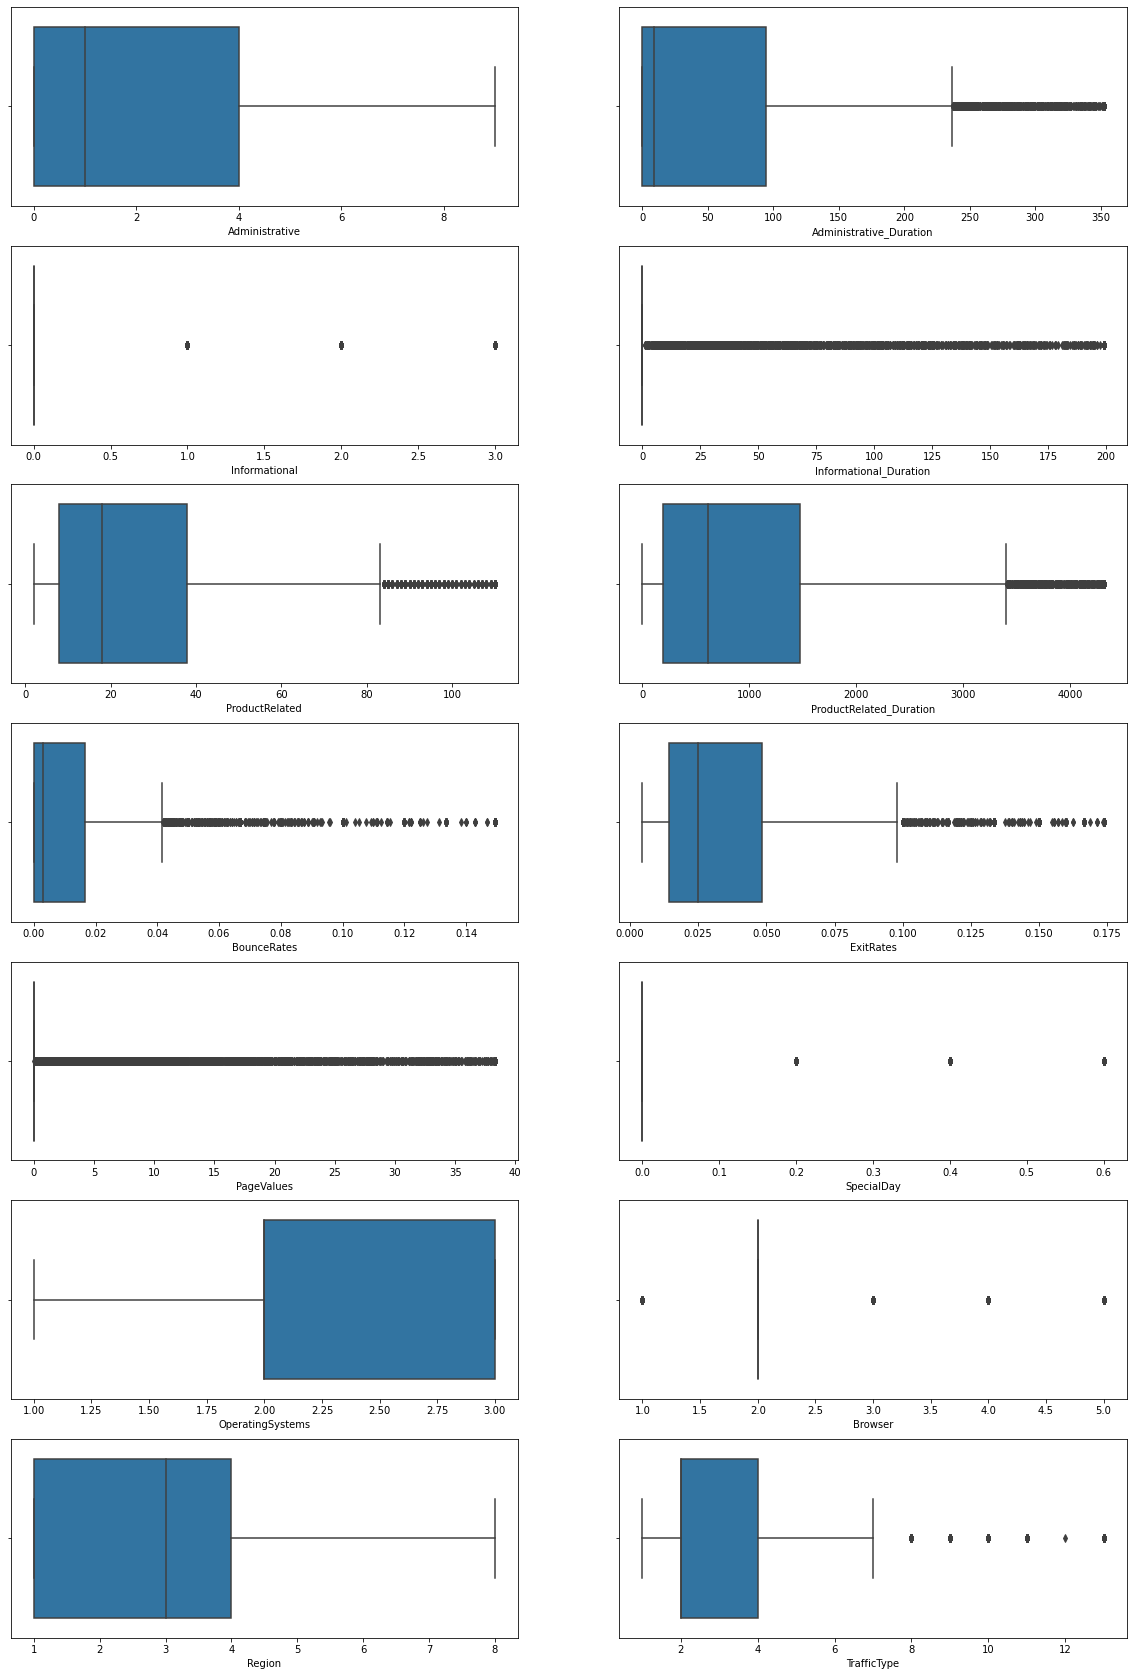

In [33]:
#Visualization After Handling Outliers
fig = plt.figure(figsize=[20,30])
for i ,col in enumerate(numerical_col):  
    ax1 = fig.add_subplot(7,2, i+1);
    ax1 = sns.boxplot(data = df, x=col)

In [34]:
print(df.Informational.unique())
print(df.Informational_Duration.unique())
print(df.Browser.unique())
print(df.SpecialDay.unique())
print(df.PageValues.unique())
print(df.OperatingSystems.unique())

[0. 1. 2. 3.]
[  0.         120.          16.          94.          93.
  75.          19.          22.         199.         153.
  48.5         51.           3.         144.         125.
 127.          84.          21.5        100.          64.
  47.          70.          14.33333333  24.          40.
 136.         116.          18.         155.5          9.
  60.          28.         142.          18.5         39.
   4.         132.          57.          14.         148.5
  71.          28.5         90.          15.         125.0952381
 103.         147.8666667   41.          53.         126.
  77.          54.          40.66666667  23.          29.5
  75.25       122.          60.5         81.         162.
  30.         104.          17.          88.          26.
  76.5         50.          13.          20.          74.75
 102.         109.75        84.5         75.5        158.
  32.          44.5         92.          81.33333333  32.5
  52.25       123.3333333  125.5         87.  

In [35]:
print(df.Browser.value_counts())

print(df.OperatingSystems.value_counts())

Browser
2.0    7883
1.0    2427
5.0    1059
4.0     731
3.0     105
Name: count, dtype: int64
OperatingSystems
2.0    6541
3.0    3115
1.0    2549
Name: count, dtype: int64


In [36]:
data.shape

(12330, 18)

In [37]:
df.shape

(12205, 18)

In [38]:
#Dropping Some Unnecessary columns
df.drop(['Informational', 'SpecialDay','PageValues', 'Browser', 'Informational_Duration'], axis=1, inplace=True)

In [39]:
df.shape

(12205, 13)

In [40]:
df.dtypes

Administrative             float64
Administrative_Duration    float64
ProductRelated             float64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
Month                        int32
OperatingSystems           float64
Region                     float64
TrafficType                float64
VisitorType                  int32
Weekend                      int64
Revenue                      int64
dtype: object

In [41]:
df.describe()

,Administrative,Administrative_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,Month,OperatingSystems,Region,TrafficType,VisitorType,Weekend,Revenue
count,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000
mean,2.175666,65.800317,28.633101,1058.834048,0.017949,0.040289,5.168046,2.046374,3.111921,3.942565,1.715936,0.234248,0.156329
std,2.815060,100.065274,29.200935,1181.878123,0.036000,0.041851,2.374071,0.679676,2.308037,3.592925,0.693425,0.423545,0.363182
min,0.000000,0.000000,2.000000,0.000000,0.000000,0.004545,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,8.000000,193.000000,0.000000,0.014231,5.000000,2.000000,1.000000,2.000000,2.000000,0.000000,0.000000
50%,1.000000,9.000000,18.000000,608.942857,0.002899,0.025000,6.000000,2.000000,3.000000,2.000000,2.000000,0.000000,0.000000
75%,4.000000,94.700000,38.000000,1477.154762,0.016667,0.048529,7.000000,3.000000,4.000000,4.000000,2.000000,0.000000,0.000000
max,9.000000,352.208095,110.000000,4312.956282,0.149333,0.173714,9.000000,3.000000,8.000000,13.000000,2.000000,1.000000,1.000000


In [42]:
df.head()

,Administrative,Administrative_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,Month,OperatingSystems,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,2.0,0.000000,0.149333,0.173714,2,1.0,1.0,1.0,2,0,0
1,0.0,0.0,2.0,64.000000,0.000000,0.100000,2,2.0,1.0,2.0,2,0,0
2,0.0,0.0,2.0,0.000000,0.149333,0.173714,2,3.0,8.0,3.0,2,0,0
3,0.0,0.0,2.0,2.666667,0.050000,0.140000,2,3.0,2.0,4.0,2,0,0
4,0.0,0.0,10.0,627.500000,0.020000,0.050000,2,3.0,1.0,4.0,2,1,0


<Axes: >

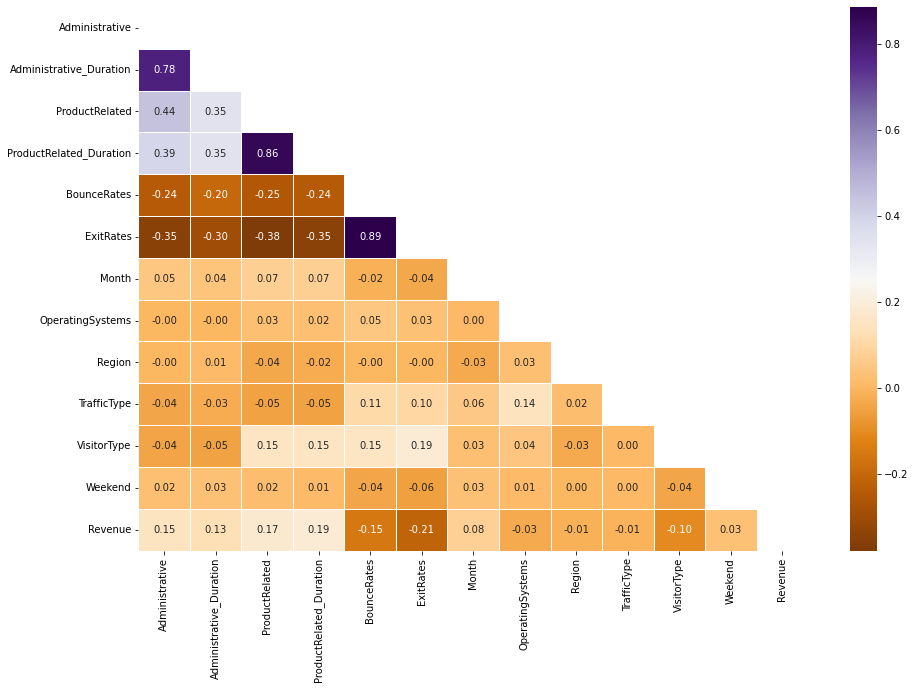

In [43]:
# Correlation Analysis Using Heatmap 

plt.figure(figsize=(15, 10))
mask = np.triu(np.ones_like(df.corr()))
sns.heatmap(df.corr(),mask= mask, annot=True, fmt='.2f', linewidths=0.5, cmap='PuOr')

In [44]:
# Separating dependent and independent features

x = df.drop('Weekend', axis=1)
y = df['Weekend']

In [45]:
!pip install imbalanced-learn

### Handling Imbalance data

In [47]:
#For balancing the imbalance dataset
from imblearn.over_sampling import SMOTENC,RandomOverSampler,KMeansSMOTE

rdsample=RandomOverSampler()
x_sampled,y_sampled  = rdsample.fit_sample(x,y)

In [48]:
print(x_sampled.shape)
print(y_sampled.shape)

(18692, 12)
(18692,)


<Axes: xlabel='Weekend', ylabel='count'>

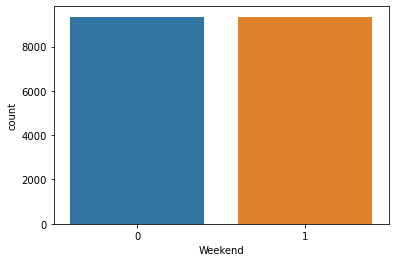

In [49]:
#after handling imbalance data
sns.countplot(data=df, x= y_sampled)       

In [50]:
# Train test Split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [51]:
#standardize or feature scaling the datasets

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

# for avoiding data leakage here we use transform not fit_transform
X_test = scaler.transform(X_test)

## Model Building

### Decision Tree

In [88]:
classifier_tree=DecisionTreeClassifier()
classifier_tree.fit(X_train,y_train)
dt_pred=classifier_tree.predict(X_test)

In [91]:
# Evaluating the model performance

cm=confusion_matrix(y_test, dt_pred)
acc = accuracy_score(y_test, dt_pred)
prec = precision_score(y_test, dt_pred)
recl = recall_score(y_test, dt_pred)
f1 = f1_score(y_test, dt_pred)
roc_auc = roc_auc_score(y_test, dt_pred)

print(f'Accuracy: {acc} \nPrecision: {prec} \nRecall: {recl} \nf1_score: {f1} \nroc_auc_curve: {roc_auc} \nConfusion matrix:\n {cm}')

Accuracy: 0.6472757066775912 
Precision: 0.2565905096660808 
Recall: 0.25 
f1_score: 0.2532523850823938 
roc_auc_curve: 0.5111066235864297 
Confusion matrix:
 [[1434  423]
 [ 438  146]]


### Random Forest

In [56]:
classifier_forest=RandomForestClassifier(criterion='entropy',random_state=0)

# training the Random Forest model on the sampled train dataset
classifier_forest.fit(X_train,y_train)

# pedicting the labels on the test set
rf_pred=classifier_forest.predict(X_test)

In [60]:
# Evaluating the model performance

accuracy = accuracy_score(rf_pred, y_test)
precision = precision_score(rf_pred, y_test)
recall = recall_score(rf_pred, y_test)
f1_score = f1_score(rf_pred, y_test)
roc_auc_score = roc_auc_score(rf_pred, y_test)
confusion_matrix = confusion_matrix(rf_pred, y_test)

print(f'Accuracy: {accuracy} \nPrecision: {precision} \nRecall: {recall} \nf1_score: {f1_score} \nroc_auc_curve: {roc_auc_score} \nConfusion matrix:\n {confusion_matrix}')

Accuracy: 0.7521507578861123 
Precision: 0.023972602739726026 
Recall: 0.2857142857142857 
f1_score: 0.044233807266982623 
roc_auc_curve: 0.5237099856665074 
Confusion matrix:
 [[1822  570]
 [  35   14]]


In [61]:
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
model = BaggingClassifier(tree.DecisionTreeClassifier(random_state=1))
model.fit(X_train, y_train)
y_pred=model.predict(X_test)

In [64]:
# Evaluating the model performance

accuracy = accuracy_score(y_pred, y_test)
precision = precision_score(y_pred, y_test)
recall = recall_score(y_pred, y_test)
f1_score = f1_score(y_pred, y_test)
roc_auc_score = roc_auc_score(y_pred, y_test)
confusion_matrix = confusion_matrix(y_pred, y_test)

print(f'Accuracy: {accuracy} \nPrecision: {precision} \nRecall: {recall} \nf1_score: {f1_score} \nroc_auc_curve: {roc_auc_score} \nConfusion matrix:\n {confusion_matrix}')

Accuracy: 0.725931995083982 
Precision: 0.07534246575342465 
Recall: 0.2543352601156069 
f1_score: 0.11624834874504623 
roc_auc_curve: 0.5081200110101844 
Confusion matrix:
 [[1728  540]
 [ 129   44]]


### AdaBoost

In [66]:
from sklearn.ensemble import AdaBoostClassifier
ada_model = AdaBoostClassifier(random_state=1)
ada_model.fit(X_train, y_train)
ada_pred = ada_model.predict(X_test)

In [69]:
# Evaluating the model performance

accuracy = accuracy_score(ada_pred, y_test)
precision = precision_score(ada_pred, y_test)
recall = recall_score(ada_pred, y_test)
f1_score = f1_score(ada_pred, y_test)
roc_auc_score = roc_auc_score(ada_pred, y_test)
confusion_matrix = confusion_matrix(ada_pred, y_test)

print(f'Accuracy: {accuracy} \nPrecision: {precision} \nRecall: {recall} \nf1_score: {f1_score} \nroc_auc_curve: {roc_auc_score} \nConfusion matrix:\n {confusion_matrix}')

Accuracy: 0.760344121261778 
Precision: 0.0 
Recall: 0.0 
f1_score: 0.0 
roc_auc_curve: 0.380327868852459 
Confusion matrix:
 [[1856  584]
 [   1    0]]


### Gradient Boosting

In [70]:
from sklearn.ensemble import GradientBoostingClassifier
grad_model = GradientBoostingClassifier(learning_rate=0.01,random_state=1)
grad_model.fit(X_train, y_train)
grad_pred = grad_model.predict(X_test)

In [76]:
# Evaluating the model performance

accuracy = accuracy_score(grad_pred, y_test)
precision = precision_score(grad_pred, y_test)
recall = recall_score(grad_pred, y_test)
f1_score = f1_score(grad_pred, y_test)
# roc_auc_score = roc_auc_score(grad_pred, y_test)
confusion_matrix = confusion_matrix(grad_pred, y_test)

print(f'Accuracy: {accuracy} \nPrecision: {precision} \nRecall: {recall} \nf1_score: {f1_score}  \nConfusion matrix:\n {confusion_matrix}')

Accuracy: 0.7607537894305613 
Precision: 0.0 
Recall: 0.0 
f1_score: 0.0  
Confusion matrix:
 [[1857  584]
 [   0    0]]


### XGBoost

In [79]:
import xgboost as xgb
model=xgb.XGBClassifier(random_state=1,learning_rate=0.01)
model.fit(X_train, y_train)
xg_pred  = model.predict(X_test)

In [83]:
# Evaluating the model performance

accuracy = accuracy_score(xg_pred, y_test)
precision = precision_score(xg_pred, y_test)
recall = recall_score(xg_pred, y_test)
f1_score = f1_score(xg_pred, y_test)
# roc_auc_score = roc_auc_score(xg_pred, y_test)
confusion_matrix = confusion_matrix(xg_pred, y_test)

print(f'Accuracy: {accuracy} \nPrecision: {precision} \nRecall: {recall} \nf1_score: {f1_score}  \nConfusion matrix:\n {confusion_matrix}')

Accuracy: 0.7607537894305613 
Precision: 0.0 
Recall: 0.0 
f1_score: 0.0  
Confusion matrix:
 [[1857  584]
 [   0    0]]


### Thank you😊